In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import numpy as np

In [2]:
text_data = pd.read_csv('./Flipkart/flipkart_com-ecommerce_sample_1050.csv')

**No copyrights issues with all the text and image data we will use in this notebook**

In [3]:
text_data = text_data.drop(columns=['crawl_timestamp', 'product_url',
        'pid', 'retail_price', 'discounted_price',
        'is_FK_Advantage_product',  'product_rating',
        'overall_rating'])

In [4]:
text_data_useable = pd.DataFrame()
text_data_useable['product_category_tree'] = text_data['product_category_tree']

In [5]:
text_data_useable

,product_category_tree
0,"[""Home Furnishing >> Curtains & Accessories >>..."
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >..."


In [6]:
def clean_category(data):
    # Remove the square brackets and double quotes
    data = data.replace('[', '').replace(']', '').replace('"', '')
    # Split the string at '>>' and take the first part
    data = data.split('>>')[0]
    # Strip leading and trailing white spaces
    data = data.strip()
    return data

In [7]:
# Apply the function to the 'product_category_tree' column
text_data_useable['product_category_tree'] = text_data_useable['product_category_tree'].apply(clean_category)

In [8]:
text_data_useable.value_counts()

product_category_tree     
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
dtype: int64

In [9]:
text_data_useable['product_name'] = text_data['product_name']
text_data_useable['description'] = text_data['description']
text_data_useable.to_csv('./Flipkart/text_data.csv', index_label=False)

In [10]:
text_data_useable

,product_category_tree,product_name,description
0,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...
1,Baby Care,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...
2,Baby Care,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...
3,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...,...
1045,Baby Care,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...
1046,Baby Care,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,Baby Care,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,Baby Care,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


Just before we start working on this let's save a copy of our dataframe for the image name and categories for later use

In [11]:
image_data = pd.DataFrame()
image_data['category'] = text_data_useable['product_category_tree']
image_data['image_name'] = text_data['image']
image_data.to_csv('./Flipkart/image_data.csv', index_label=False)

**We now have a workable dataframe with the important key words four each of our items and clear categories**

It's now time to prepare the data to be understood better by the computer

- Put everything in lowercase
- Remove punctuation
- We will remove the words that don't bring meaningful info (stopwords)
- Reducing words to their dictionary or base form (lemmatization)
- Reducing words to their root: no pre, sufixes or conjugation (Stemming)

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jbgid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jbgid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Initialize a WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert the text to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords, lemmatize, and stem the words (maybe stemming the words loose too much data be mindeful)
    #text = [stemmer.stem(lemmatizer.lemmatize(word)) for word in text.split() if word not in stopwords.words('english')]
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')]
    # Join the words back into a single string
    text = ' '.join(text)
    return text

# Count the number of words before preprocessing
word_count_before = text_data_useable['description'].apply(lambda x: len(x.split())).sum() + text_data_useable['product_name'].apply(lambda x: len(x.split())).sum()
print(f'Word count before preprocessing: {word_count_before}')

# Preprocess the 'description' and 'product_name' columns
text_data_useable['description'] = text_data_useable['description'].apply(preprocess_text)
text_data_useable['product_name'] = text_data_useable['product_name'].apply(preprocess_text)

# Count the number of words after preprocessing
word_count_after = text_data_useable['description'].apply(lambda x: len(x.split())).sum() + text_data_useable['product_name'].apply(lambda x: len(x.split())).sum()
print(f'Word count after preprocessing: {word_count_after}')

Word count before preprocessing: 87644


Word count after preprocessing: 65960


In [14]:
text_data_useable

,product_category_tree,product_name,description
0,Home Furnishing,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...
1,Baby Care,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...
2,Baby Care,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...
3,Home Furnishing,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...
4,Home Furnishing,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...
...,...,...,...
1045,Baby Care,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...
1046,Baby Care,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...
1047,Baby Care,uberlyfe extra large pigmented polyvinyl film ...,buy uberlyfe extra large pigmented polyvinyl f...
1048,Baby Care,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker rs...


In [15]:
# Initialize two CountVectorizers
vectorizer1 = CountVectorizer() # for word count or TfidfVectorizer() for word importance 
vectorizer2 = CountVectorizer() # for word count or TfidfVectorizer() for word importance 

# Fit the first vectorizer to the 'description' column and transform the text to a numeric matrix
description_features = vectorizer1.fit_transform(text_data_useable['description'])

# Fit the second vectorizer to the 'product_name' column and transform the text to a numeric matrix
product_name_features = vectorizer2.fit_transform(text_data_useable['product_name'])

# Convert the matrices to DataFrames
description_features_df = pd.DataFrame(description_features.toarray(), columns=vectorizer1.get_feature_names())
product_name_features_df = pd.DataFrame(product_name_features.toarray(), columns=vectorizer2.get_feature_names())

# Concatenate the two DataFrames along the column axis
combined_features_cvector = pd.concat([description_features_df, product_name_features_df], axis=1)


c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# Combine the 'product_name' and 'description' columns
text_data_useable['combined'] = text_data_useable['product_name'] + ' ' + text_data_useable['description']

# Initialize a CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the 'combined' column and transform the text to a numeric matrix
vectorizer.fit(text_data_useable['combined'])
combined_features = vectorizer.transform(text_data_useable['combined'])

# Convert the matrix to a DataFrame
combined_features_tfidf = pd.DataFrame(combined_features.toarray(), columns=vectorizer.get_feature_names())

c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


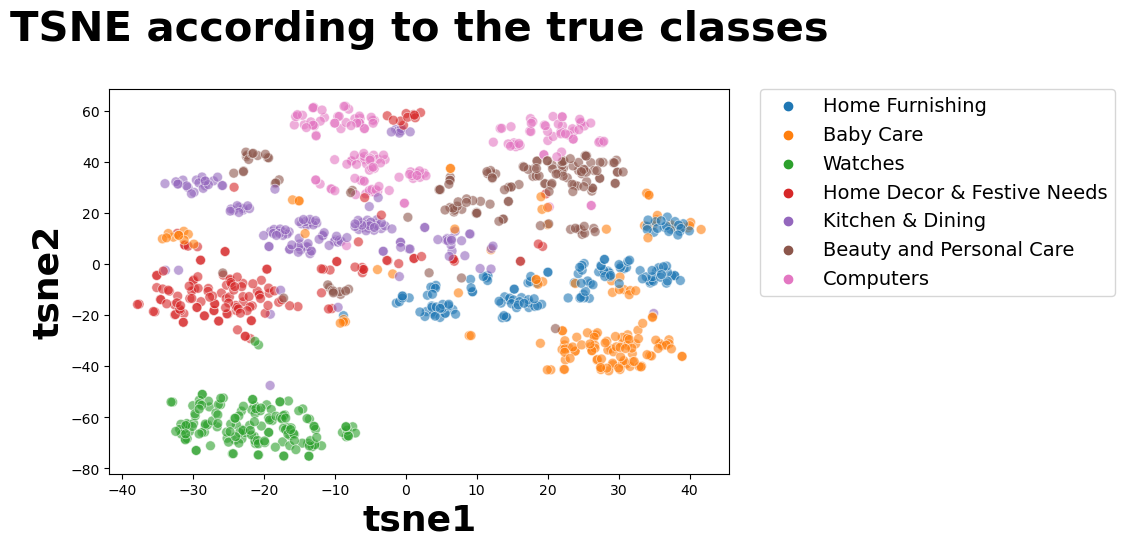

In [17]:
from sklearn import manifold, decomposition
import seaborn as sns
import matplotlib.pyplot as plt



# Apply PCA to the text features
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(combined_features_tfidf)

# Apply t-SNE to the PCA features
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

# Create a DataFrame for the t-SNE coordinates so we can plot it
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = text_data_useable["product_category_tree"]

# Create a scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE according to the true classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [19]:
# to help confirm those visual 'clusters' we will use a kmeans and check the rand index between our categ and the clustering
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Perform KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df_tsne['cluster'] = kmeans.fit_predict(df_tsne[['tsne1', 'tsne2']])

# Calculate the Rand index
rand_index = adjusted_rand_score(df_tsne['class'], df_tsne['cluster'])
print(f'Rand index: {rand_index}')


Rand index: 0.49126859466672784


0.5 is high enough for the clusters to not be a random occurence

**We can comfirm that it is possible to automaticly transform text into features that can be sorted into categories**

---------------------------------------------------------------------
**Let's now try better and more advanced techniques**

- we will compare them with the T-SNE graph and the rand index
- let's build this into a function so we can use it easily every time we need it

In [20]:
def get_graph_and_ari(
        feature_df : pd.DataFrame,
        categories
        ):
    """
    feature_df : the features of your text or image

    categories : the true categories of your items, pass a df column or an array
    """
    # Apply PCA to the text features
    pca = decomposition.PCA(n_components=0.99)
    feat_pca = pca.fit_transform(feature_df)

    # Apply t-SNE to the PCA features
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(feat_pca)

    # Create a DataFrame for the t-SNE coordinates so we can plot it
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne["class"] = categories

    # Create a scatter plot
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue="class",
        palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
        data=df_tsne,
        legend="brief")

    plt.title('TSNE according to the true classes', fontsize = 30, pad = 35, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    plt.legend(prop={'size': 14}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=7, random_state=42)
    df_tsne['cluster'] = kmeans.fit_predict(df_tsne[['tsne1', 'tsne2']])

    # Calculate the Rand index
    rand_index = adjusted_rand_score(df_tsne['class'], df_tsne['cluster'])
    print(f'Rand index: {rand_index}')
    
    return

**Word2Vec:** 

Word2Vec is a two-layer neural network that processes text by vectorizing words.

Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus.

In [21]:
from gensim.models import Word2Vec

# Tokenize the text
text_data_useable['tokenized'] = text_data_useable['combined'].apply(lambda x: x.split())

# Train a Word2Vec model
model = Word2Vec(text_data_useable['tokenized'], min_count=1)

# Get the mean vector for each document
text_data_useable['word2vec'] = text_data_useable['tokenized'].apply(lambda x: np.mean([model.wv[word] for word in x], axis=0))


**BERT (Bidirectional Encoder Representations from Transformers):**

 BERT is a transformer-based machine learning technique for natural language processing (NLP) pre-training. 

In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize a BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Get the BERT embeddings for each document
text_data_useable['bert'] = text_data_useable['combined'].apply(lambda x: model.encode(x))


**USE (Universal Sentence Encoder):**

The Universal Sentence Encoder encodes text into high-dimensional vectors.

In [ ]:
import tensorflow_hub as hub

# Load the Universal Sentence Encoder's TF Hub module
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Get the USE embeddings for each document
text_data_useable['use'] = text_data_useable['combined'].apply(lambda x: model([x]).numpy()[0])


In [ ]:
text_data_useable

,product_category_tree,product_name,description,combined,tokenized,word2vec,bert,use
0,Home Furnishing,elegance polyester multicolor abstract eyelet ...,key feature elegance polyester multicolor abst...,elegance polyester multicolor abstract eyelet ...,"[elegance, polyester, multicolor, abstract, ey...","[-0.24056101, 0.013938149, 0.28919527, -0.3520...","[-0.7200642, 0.75273913, 0.29122066, 0.2689587...","[-0.053927224, -0.054106914, 0.04280648, 0.051..."
1,Baby Care,sathiyas cotton bath towel,specification sathiyas cotton bath towel 3 bat...,sathiyas cotton bath towel specification sathi...,"[sathiyas, cotton, bath, towel, specification,...","[-0.37326404, -0.006315552, 0.37895715, -0.529...","[-0.53087616, 0.86288995, -0.62819076, 0.28183...","[-0.04828699, -0.044637267, 0.02435021, 0.0387..."
2,Baby Care,eurospa cotton terry face towel set,key feature eurospa cotton terry face towel se...,eurospa cotton terry face towel set key featur...,"[eurospa, cotton, terry, face, towel, set, key...","[-0.28039902, 0.040122338, 0.32161602, -0.3633...","[-0.8098636, 0.34847215, -0.64972603, 0.383129...","[-0.05396131, -0.052647356, -0.025579223, 0.05..."
3,Home Furnishing,santosh royal fashion cotton printed king size...,key feature santosh royal fashion cotton print...,santosh royal fashion cotton printed king size...,"[santosh, royal, fashion, cotton, printed, kin...","[-0.23348178, -0.0017667812, 0.33218136, -0.48...","[-0.7391474, 0.73026836, -0.6040457, 0.3069682...","[-0.05405646, -0.052813128, 0.051422346, 0.053..."
4,Home Furnishing,jaipur print cotton floral king sized double b...,key feature jaipur print cotton floral king si...,jaipur print cotton floral king sized double b...,"[jaipur, print, cotton, floral, king, sized, d...","[-0.24732925, 0.021710303, 0.34814492, -0.4464...","[-0.45985597, 0.7153561, -0.59504235, 0.198684...","[-0.052691624, -0.051802408, 0.048600104, 0.05..."
...,...,...,...,...,...,...,...,...
1045,Baby Care,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,"[oren, empower, extra, large, self, adhesive, ...","[-0.17356902, 0.03788865, 0.21179375, -0.18850...","[-0.2698073, 1.0099094, -0.27018356, 0.4514415...","[-0.05011801, -0.034518227, 0.03405683, 0.0512..."
1046,Baby Care,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack 1 ...,wallmantra large vinyl sticker sticker wallman...,"[wallmantra, large, vinyl, sticker, sticker, w...","[-0.24877508, 0.06535199, 0.32931313, -0.23717...","[-0.29834923, 1.2114168, 0.66799915, -0.059236...","[-0.05745368, -0.04995314, 0.045963746, 0.0564..."
1047,Baby Care,uberlyfe extra large pigmented polyvinyl film ...,buy uberlyfe extra large pigmented polyvinyl f...,uberlyfe extra large pigmented polyvinyl film ...,"[uberlyfe, extra, large, pigmented, polyvinyl,...","[-0.16480786, 0.23127976, 0.30482042, -0.01057...","[-0.34023258, 0.7605413, -0.37721696, 0.195144...","[-0.013566432, -0.04083462, -0.019997526, 0.02..."
1048,Baby Care,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker rs...,wallmantra medium vinyl sticker sticker buy wa...,"[wallmantra, medium, vinyl, sticker, sticker, ...","[-0.23136622, 0.30711314, 0.42263868, -0.03151...","[-0.6121992, 0.8881179, -0.16390446, -0.041062...","[-0.007884299, -0.044314165, 0.051717374, 0.04..."


c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


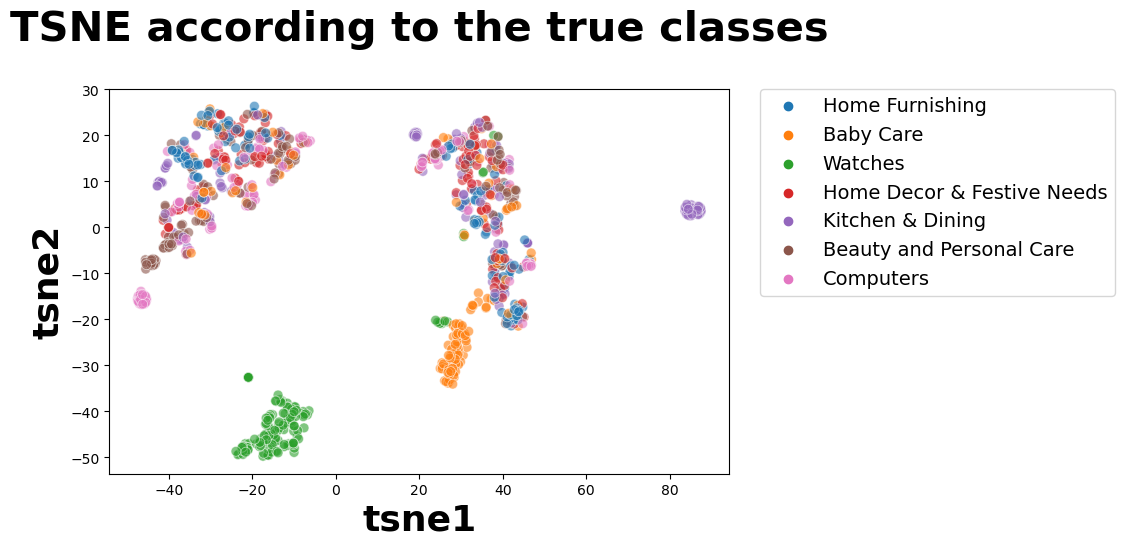

Rand index: 0.1925855267844711


c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


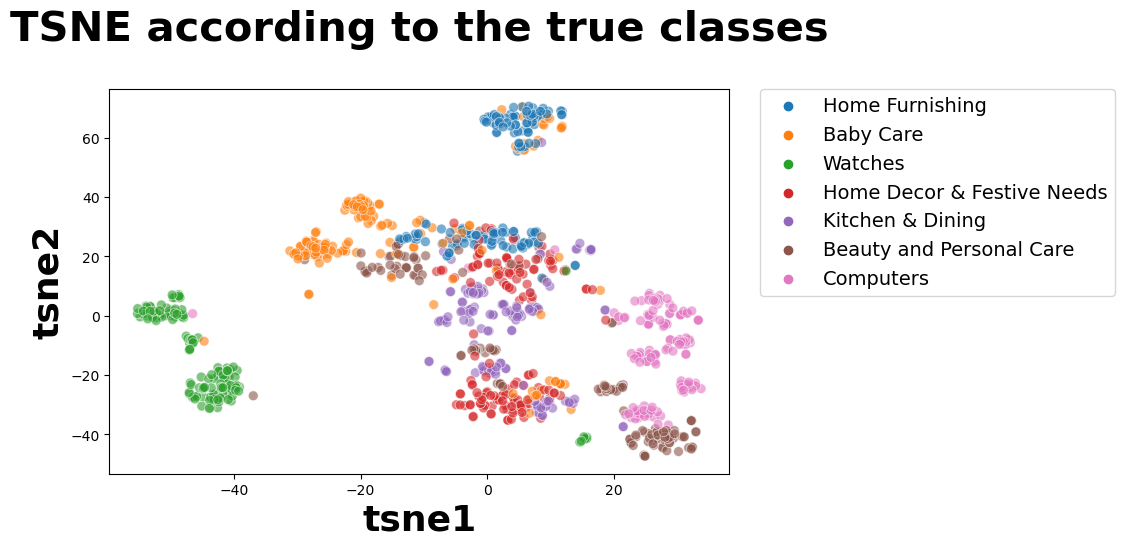

Rand index: 0.4134534468309783


c:\ProgramData\Anaconda3\envs\Projet_p4\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


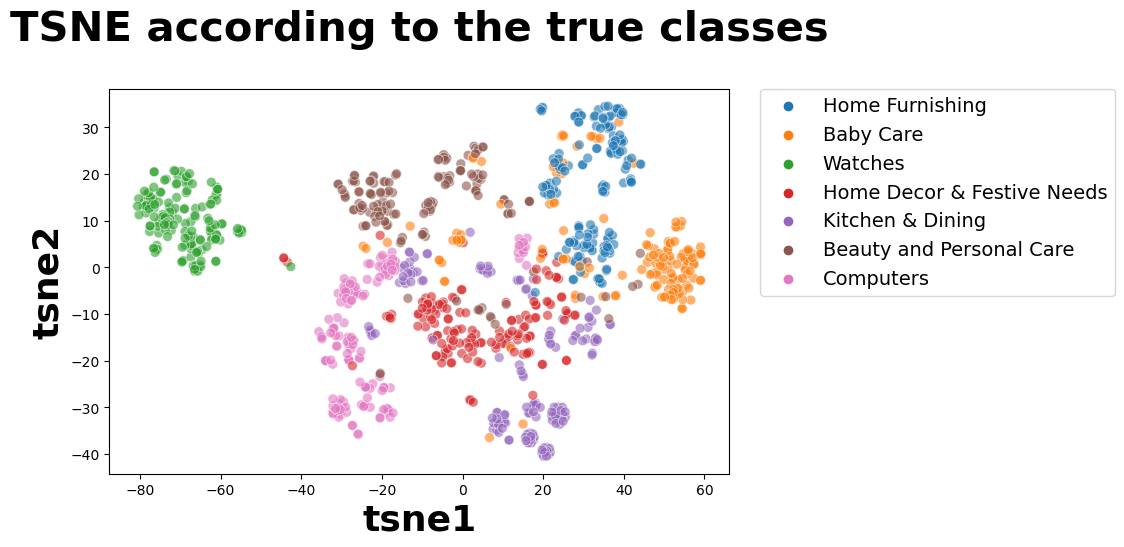

Rand index: 0.4660123193298835


In [ ]:
# For Word2Vec
get_graph_and_ari(text_data_useable['word2vec'].tolist(), text_data_useable['product_category_tree'])

# For BERT
get_graph_and_ari(text_data_useable['bert'].tolist(), text_data_useable['product_category_tree'])

# For USE
get_graph_and_ari(text_data_useable['use'].tolist(), text_data_useable['product_category_tree'])


**The results are not amazing, there could be a few reasons for that:**

- Preprocessing, some models work better with the stopwords or less preprocessing for more natural speech
- Those are pre trained model and the training data they had might be different from the data we have
- Parameter tuning some of those model have parameters that can be fine-tuned

**Let's now explore the images**